In [476]:
import os
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Sobre el dataset:**

* **Age** --> Age of the patient.
* **Sex** --> Sex of the patient.
* **exang** --> exercise induced angina(1 = yes; 0 = no).
* **ca** --> number of major vessels (0-3).
* **cp** --> Chest Pain type.
 * Value 1 --> typical angina.
 * Value 2 --> atypical angina.
 * Value 3 --> non-anginal pain.
 * Value 4 --> asymptomatic.
* **trtbps** --> resting blood pressure (in mm Hg).
* **chol** --> cholestoral in mg/dl fetched via BMI sensor.
* **fbs** --> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
* **rest_ecg** --> resting electrocardiographic results.
 * Value 0 --> normal.
 * Value 1 --> having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV).
 * Value 2 --> showing probable or definite left ventricular hypertrophy by Estes' criteria.
* **thalach** --> maximum heart rate achieved.
* **target** --> 0= less chance of heart attack 1= more chance of heart attack.

# **Recolectar datos**

In [477]:
# Ejecutar:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

# **Procesar datos**

In [478]:
#leo las primeras 5 filas del archivo 'heart.csv'
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [479]:
#verifico si el dataset tiene valores NaN
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [480]:
#Cantidad de resultados posibles que tiene cada columna
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [481]:
#cantidad de datos a analizar
print('Columnas a analizar:', df.shape[1])
print('Filas a analizar:', df.shape[0])

Columnas a analizar: 14
Filas a analizar: 303


# **Explorar datos**

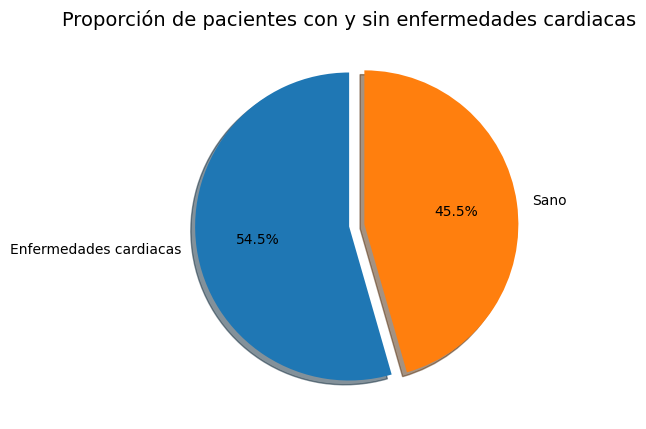

In [482]:
#visualización de las proporciónes de la columna target(columna objetivo)
labels = ['Enfermedades cardiacas', 'Sano']
y = [df.target[df['target']==1].count(), df.target[df['target']==0].count()]

explode = (0,0.1)
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot()

ax.pie(y, labels= labels, explode= explode, autopct= '%1.1f%%', shadow= True, startangle=90)
ax.set_title('Proporción de pacientes con y sin enfermedades cardiacas', size= 14)

plt.show()

Se puede ver en el grafico de torta, que dentro de todo, los valores entre lso pacientes que estan con enfermedad cardica y los que no, estan balanceados, por lo que no va a ser necesario hacer una modificación de los datos (sub-muestreo o sobre-muestreo) para tener un mejor modelo de machine learning.

In [483]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


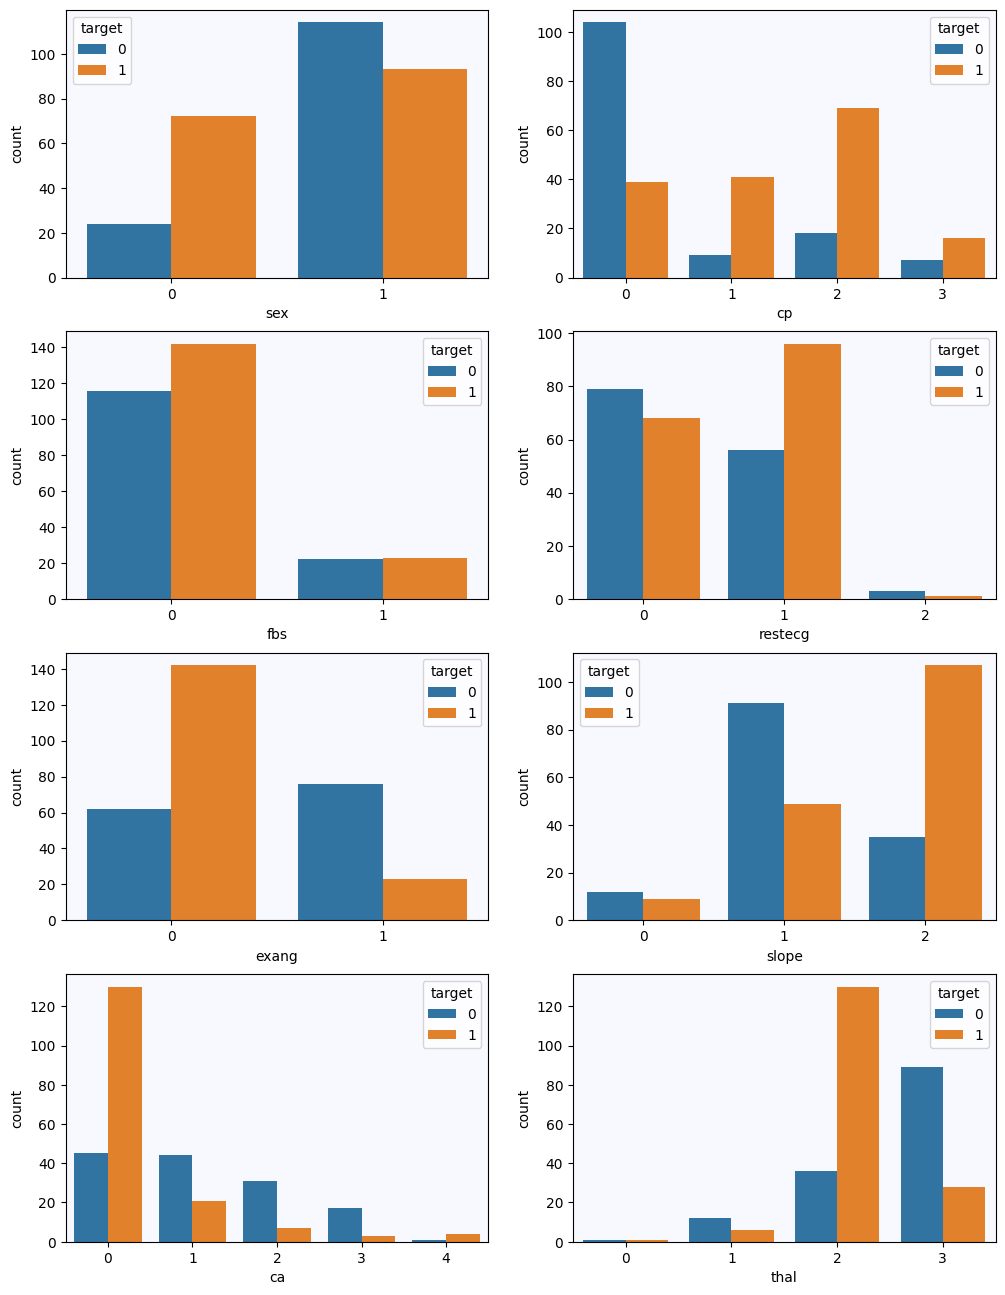

In [484]:
#Visualización de los datos categoricos con relación a la columna target:
#('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal')

#genero la figura
fig = plt.figure(figsize= (12,16))

#creo la lista de los valores categoricos
list_cat= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
j=0

#genero un bucle que vaya leyendo los datos de la lista y los grafico
for i in list_cat:
    ax = fig.add_subplot(4,2,j+1)
    sns.countplot(data=df,hue= 'target', x=i, ax= ax)
    ax.set_facecolor('#F8F8FF')
    j  += 1

plt.show()

**Conclusión:**
* Se puede observar que en este dataset hay más personas del género masculino (1) que del género femenino (0), aun así, al comparar los datos, se puede ver que la mayoría de las mujeres tienen una enfermedad cardiaca mientras que los hombres tienen más probabilidad de estar sanos.
* También, se puede ver que los que tienen un valor de 0 en la columna 'cp' son los que tienen más probabilidad de estar sanos.
* En el caso de la columna 'fbs', las personas con valor 1 estan bastante balanceadas entre las que tienen una enfermedad cardiaca y las que no, mientras los que tienen un valor de 0 tienden a tener mas posibilidad de tener una enfermedad cardica.
* En 'restecg' se puede ver que gran parte de las personas que tienen un valor de 1 tienen una enfermedad cardiaca.
* En el caso de 'exang', se ve que las personas con enfermedad cardiaca tienen en su mayoría un valor de 0.
* En la columna de 'slope', los que tienen un valor de 2 son más propensos a tener una enfermedad cardiaca.
* Además, podemos ver que en la columna de 'ca', la mayoría de las personas con un valor de 0 tienen una enfermedad cardiaca.
* Y por último, también se puede observar que en la columna 'thal', los que tienen un valor de 2, generalmente son personas con una enfermedad cardiaca.


In [485]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


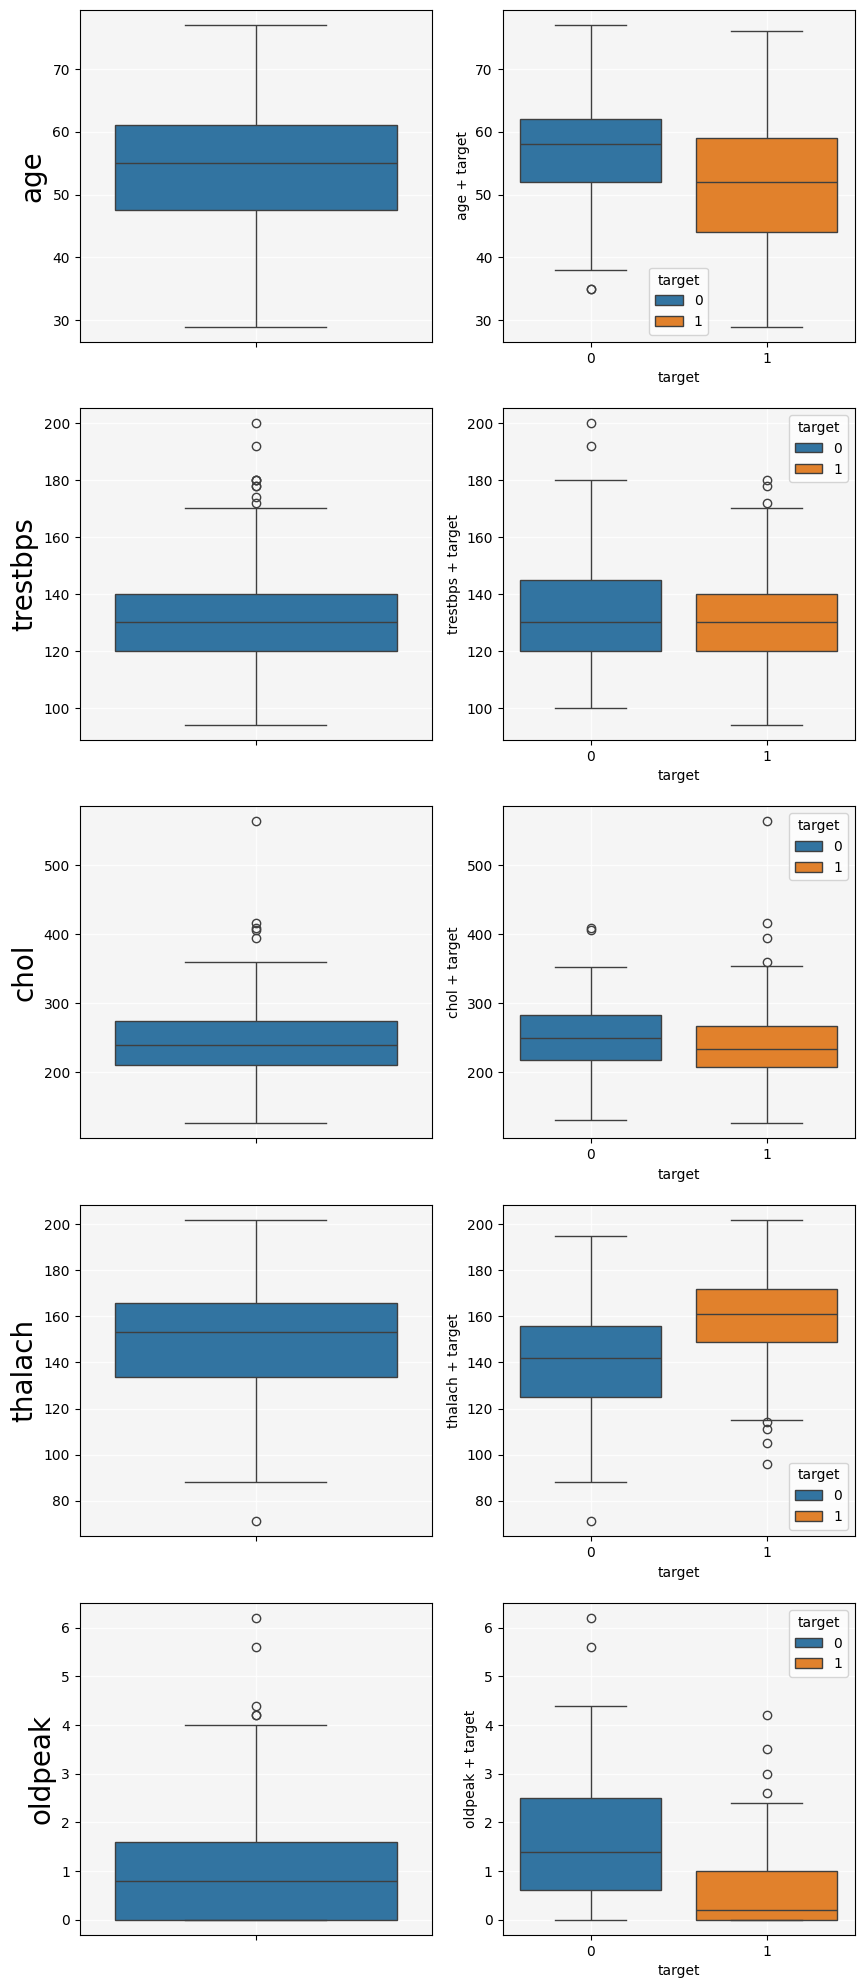

In [486]:
#Visualización el balance de los datos continuos:
#('age', 'trestbps', 'chol', 'thalach', 'oldpeak')

#genero la figura
fig = plt.figure(figsize=(10,25))

#creo la lista con las columnas de valores continuos
list_con= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
c= 0

#genero un bucle que vaya leyendo las columnas de la lista y finalmente
#muestro los graficos
for i in list_con:
    ax = fig.add_subplot(5,2,c+1)
    ax2 = fig.add_subplot(5,2,c+2)
    sns.boxplot(data= df, y=i, ax=ax)
    sns.boxplot(data= df, y=i, x='target', hue= 'target', ax=ax2)
    ax.set_ylabel(i, size=20)
    ax2.set_ylabel(i+' + target', size=10)
    ax.set_facecolor('#F5F5F5')
    ax2.set_facecolor('#F5F5F5')
    ax.grid(color='white', linestyle='-', linewidth=1, alpha=0.90)
    ax2.grid(color='white', linestyle='-', linewidth=1, alpha=0.90)
    c += 2
plt.show()

**Conclusión:**

Dentro de estos gráficos podemos ver tanto el balance de las columnas continuas individualmente como en relación con la columna target. Allí podemos encontrar que:
* La mayoría de las personas en el dataset rodean entre los 48 y 62 años de edad, además, se ve que las personas con una enfermedad cardiaca rodean los 45 y 60 años mientras que los sanos se encuentran entre los 50 y 62 años. Esto así, no nos muestra mucha diferencia entre los que tienen y no tienen una enfermedad cardiaca.
* En los gráficos de la columna 'thalach', las personas con enfermedad cardiaca tienden a estar entre los valores 150 y 170, mientras que las personas sanas se encuentran por lo general entre 125 y 155.
* Y en los gráficos de 'oldpeack' las personas sanas se encuentran en su mayoría entre los valores 0.6 y 2.5, mientras que las personas con enfermedad cardiaca se encuentran entre los valores 0 a 1.


## Codificar columnas categoricas

In [487]:
#aplico OneHotEncoding a las columnas categoricas
#como las columnas categoricas ya se encuentran codificadas, no es necesario
# aplicar Label encoder y puedo pasar directamente a OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#genero función de one_hot_encoding para convertir las columnas categoricas
def one_hot_encoding(df,column):
    df_copy= df.copy()

    #aplico onehotencoder a la columna correspondiente
    onehot_encoder = OneHotEncoder(sparse=False)
    one_hot_encoding = onehot_encoder.fit_transform(df_copy[[column]])

    #se crean las columnas con los valores de one_hot_encoder
    one_hot_encoding_df = pd.DataFrame(one_hot_encoding, dtype= int)

    #se agrega el sufijo
    one_hot_encoding_df= one_hot_encoding_df.add_prefix(column+'_')

    #se unen las nuevas columnas al dataset original
    df_copy = df_copy.join(one_hot_encoding_df)

    #y finalmente se elimina la columna vieja
    df_copy = df_copy.drop([column],axis=1)

    return df_copy, onehot_encoder

In [488]:
#creo otra copia del dataset ordenado
df_cod = df.copy()
df_cod.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [489]:
#le aplico la funcion de one_hot_encoder a las columnas correspondientes y
#visualizo el dataset
df_cod, ohe_sex = one_hot_encoding(df_cod,'sex')
df_cod, ohe_cp = one_hot_encoding(df_cod,'cp')
df_cod, ohe_fbs = one_hot_encoding(df_cod,'fbs')
df_cod, ohe_restecg = one_hot_encoding(df_cod,'restecg')
df_cod, ohe_exang = one_hot_encoding(df_cod,'exang')
df_cod, ohe_slope = one_hot_encoding(df_cod,'slope')
df_cod, ohe_ca = one_hot_encoding(df_cod,'ca')
df_cod, ohe_thal = one_hot_encoding(df_cod,'thal')
df_cod.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [490]:
#genero otra copia del dataset ya codificado para normalizar las columnas continuas
df_norm = df_cod.copy()

## Normalizar columnas continuas

In [491]:
#normalizar las columnas continuas con rodustscaler por los outliers de
#los datos continuos y visualizo el dataset ya normalizado
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_norm[list_con]=scaler.fit_transform(df_norm[list_con])

df_norm.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# **Entrenar modelo**

In [492]:
#se generan las variables X e y para entrenar el modelo
X = df_norm.drop('target', axis=1).values
y = df_norm['target'].values

In [493]:
#se crea el campo de entrenamiento, 70% train, 30% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [494]:
#Función para la predicción de los modelos y conseguir el accuracy
from sklearn.metrics import accuracy_score
def best_model(model, X_test, y_test, name):
    y_hat = model.predict(X_test)
    accuracy= accuracy_score(y_test, y_hat, normalize=True)
    print(f'\nAccuracy del modelo {name.upper()}:')
    print(accuracy)
    return y_hat, accuracy

## K-Nearest Neighbours(KNN)

In [495]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

In [496]:
knn_1 = KNeighborsClassifier(n_neighbors=10)
knn_1 = knn_1.fit(X_train, y_train)

## Random Forest Classifier

In [497]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=4, max_depth=5, criterion='entropy', random_state=0)
rfc = rfc.fit(X_train, y_train)

In [498]:
rfc_1 = RandomForestClassifier(n_estimators=5, max_depth=10, criterion='entropy', random_state=0)
rfc_1 = rfc_1.fit(X_train, y_train)

## Decision Tree Classifier

In [499]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc = dtc.fit(X_train, y_train)

In [500]:
dtc_1 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtc_1 = dtc_1.fit(X_train, y_train)

## Support Vector Machine (SVM)

In [501]:
from sklearn import svm
svc = svm.SVC(kernel='poly')
svc = svc.fit(X_train, y_train)

## Logistic Regression

In [502]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag')
lr = lr.fit(X_train, y_train)

# **Validar Modelos**

In [503]:
#validar los modelos por su accuracy
y_hat_knn, accuracy_knn = best_model(knn, X_test, y_test, 'KNN')
y_hat_knn_1, accuracy_knn_1 = best_model(knn_1, X_test, y_test, 'KNN_1')
y_hat_rfc, accuracy_rfc = best_model(rfc, X_test, y_test, 'rfc')
y_hat_rfc_1, accuracy_rfc_1 = best_model(rfc_1, X_test, y_test, 'rfc_1')
y_hat_dtc, accuracy_dtc = best_model(dtc, X_test, y_test, 'dtc')
y_hat_dtc_1, accuracy_dtc_1 = best_model(dtc_1, X_test, y_test, 'dtc_1')
y_hat_svc, accuracy_svc = best_model(svc, X_test, y_test, 'svc')
y_hat_lr, accuracy_lr = best_model(lr, X_test, y_test, 'lr')


Accuracy del modelo KNN:
0.8351648351648352

Accuracy del modelo KNN_1:
0.8461538461538461

Accuracy del modelo RFC:
0.8021978021978022

Accuracy del modelo RFC_1:
0.8241758241758241

Accuracy del modelo DTC:
0.7472527472527473

Accuracy del modelo DTC_1:
0.7582417582417582

Accuracy del modelo SVC:
0.8461538461538461

Accuracy del modelo LR:
0.8571428571428571


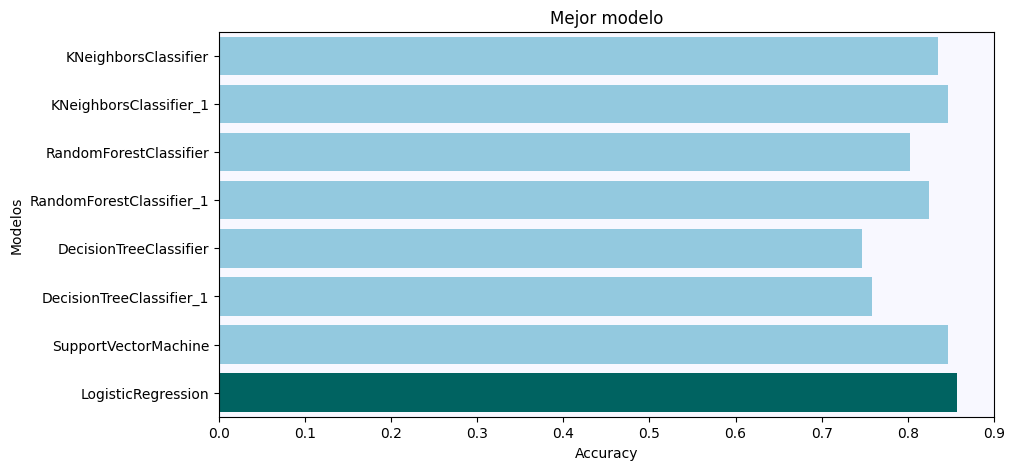

In [504]:
#creo grafico de barra para comparar los resultados de los modelos
#lista de los modelos
modelos = ['KNeighborsClassifier','KNeighborsClassifier_1', 'RandomForestClassifier',
           'RandomForestClassifier_1','DecisionTreeClassifier', 'DecisionTreeClassifier_1',
           'SupportVectorMachine', 'LogisticRegression']
#accuracies de los modelos
accuracy = [accuracy_knn, accuracy_knn_1, accuracy_rfc, accuracy_rfc_1, accuracy_dtc,
            accuracy_dtc_1, accuracy_svc, accuracy_lr]

#genero la figura
fig = plt.figure(figsize=(10,5))
#genero el grafico con los modelos y accuracies
ax = sns.barplot(y=modelos, x=accuracy, color= 'skyblue')

#destaco la barra con mejor accuracy
color = '#006361'
accuracy_max= max(accuracy)
barra_max= accuracy.index(accuracy_max)
ax.patches[barra_max].set_facecolor(color)

ax.set_title('Mejor modelo')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Modelos')

ax.set_facecolor('#F8F8FF')
plt.show()

Podemos ver que el mejor modelo por ahora es el de LogisticRegression con un accuracy de 0.8571428571428571

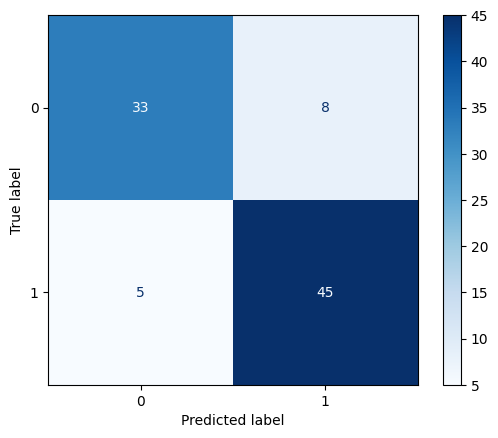

In [505]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test, y_hat_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
cmd.plot(cmap=plt.cm.Blues)

En el grafico se puede visualizar que el modelo se equivocó 13 veces. 5 veces donde el modelo confundió a personas con enfermedad cardiaca con personas sanas y 8 veces donde confundió personas sanas con personas con enferedad cardica.

# **Automatizar modelos**
Para automatizar los modelos voy a utilizar la herramienta GridSearchCV de Scikit-Learn.

In [506]:
from sklearn.model_selection import GridSearchCV

In [507]:
#Función para visualizar los datos de los modelos creados
def grid_model(model,name):
    print(f'\nMODELO {name.upper()}:')
    print(f'Mejor modelo:', model.best_estimator_)
    print(f'Mejores parametros:', model.best_params_)
    print(f'Mejor score:', model.best_score_)

## Grid - K-Nearest Neighbours(KNN)

In [508]:
parameters_knn= {"n_neighbors":[2,4,5,7,8,10,13,15]}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, parameters_knn, scoring = 'accuracy',cv=25)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=25, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 5, 7, 8, 10, 13, 15]},
             scoring='accuracy')

## Grid - Random Forest Classifier

In [509]:
parameters_rfc = {"criterion":["gini", "entropy"],
                  "n_estimators": [4,5,8,10,12,15,17,19,21],
                  "max_depth": [4,5,8,10,12,15,16,19,20]}
rfc = RandomForestClassifier()
grid_rfc= GridSearchCV(rfc, parameters_rfc, scoring='accuracy',cv=25)
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=25, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10, 12, 15, 16, 19, 20],
                         'n_estimators': [4, 5, 8, 10, 12, 15, 17, 19, 21]},
             scoring='accuracy')

## Grid - Decision Tree Classifier

In [510]:
parameters_dtc = {"criterion":["gini", "entropy"],
                  "max_depth": [4,5,8,10,12,15,16,19,20]}
dtc = DecisionTreeClassifier()
grid_dtc= GridSearchCV(dtc, parameters_dtc, scoring='accuracy',cv=25)
grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=25, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10, 12, 15, 16, 19, 20]},
             scoring='accuracy')

## Grid - Support Vector Machine (SVM)

In [511]:
parameters_svc = {"C":[1,3,5,7,10,12,15,18,20],
                  "kernel":["linear", "poly", "rbf", "sigmoid"],
                  "gamma" : [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
svc = svm.SVC()
grid_svc= GridSearchCV(svc, parameters_svc, scoring='accuracy', cv=25)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=25, estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7, 10, 12, 15, 18, 20],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

## Grid - Logistic Regression

In [512]:
parameters_lr = {'solver':('lbfgs', 'sag')}
lr = LogisticRegression()
grid_lr= GridSearchCV(lr, parameters_lr, scoring='accuracy',cv=25)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=25, estimator=LogisticRegression(),
             param_grid={'solver': ('lbfgs', 'sag')}, scoring='accuracy')

# **Validar modelos automatizados**

In [513]:
grid_model(grid_knn, 'KNeighborsClassifier')
grid_model(grid_rfc, 'RandomForestClassifier')
grid_model(grid_dtc, 'DecisionTreeClassifier')
grid_model(grid_svc, 'svc')
grid_model(grid_lr, 'LogisticRegression')


MODELO KNEIGHBORSCLASSIFIER:
Mejor modelo: KNeighborsClassifier()
Mejores parametros: {'n_neighbors': 5}
Mejor score: 0.8538888888888888

MODELO RANDOMFORESTCLASSIFIER:
Mejor modelo: RandomForestClassifier(max_depth=15, n_estimators=15)
Mejores parametros: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 15}
Mejor score: 0.8511111111111112

MODELO DECISIONTREECLASSIFIER:
Mejor modelo: DecisionTreeClassifier(criterion='entropy', max_depth=8)
Mejores parametros: {'criterion': 'entropy', 'max_depth': 8}
Mejor score: 0.811111111111111

MODELO SVC:
Mejor modelo: SVC(C=10, gamma=0.01)
Mejores parametros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mejor score: 0.8627777777777778

MODELO LOGISTICREGRESSION:
Mejor modelo: LogisticRegression()
Mejores parametros: {'solver': 'lbfgs'}
Mejor score: 0.84


In [514]:
y_hat_gred_knn, accuracy_knn_grid = best_model(grid_knn, X_test, y_test, 'knn')
y_hat_gred_rfc, accuracy_rfc_grid = best_model(grid_rfc, X_test, y_test, 'rfc')
y_hat_gred_dtc, accuracy_dtc_grid = best_model(grid_dtc, X_test, y_test, 'dtc')
y_hat_gred_svc, accuracy_svc_grid = best_model(grid_svc, X_test, y_test, 'svc')
y_hat_gred_lr, accuracy_lr_grid = best_model(grid_lr, X_test, y_test, 'lr')


Accuracy del modelo KNN:
0.8351648351648352

Accuracy del modelo RFC:
0.8021978021978022

Accuracy del modelo DTC:
0.7802197802197802

Accuracy del modelo SVC:
0.8571428571428571

Accuracy del modelo LR:
0.8571428571428571


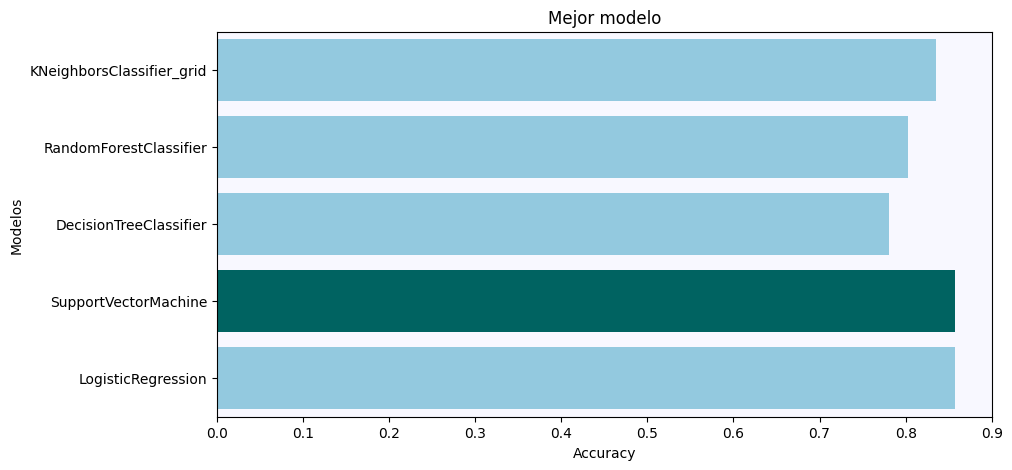

In [515]:
modelos = ['KNeighborsClassifier_grid', 'RandomForestClassifier',
           'DecisionTreeClassifier', 'SupportVectorMachine', 'LogisticRegression']
accuracy = [accuracy_knn_grid, accuracy_rfc_grid, accuracy_dtc_grid,
            accuracy_svc_grid, accuracy_lr_grid]

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(y=modelos, x=accuracy, color= 'skyblue')

#destaco la barra con mejor accuracy
color = '#006361'
accuracy_max= max(accuracy)
barra_max= accuracy.index(accuracy_max)
ax.patches[barra_max].set_facecolor(color)

ax.set_title('Mejor modelo')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Modelos')

ax.set_facecolor('#F8F8FF')
plt.show()

**Conclusión:**
Con GridSearchCVpudimos mejorar algunos de nuestros modelos, y aun asi, LogisticRegression sigue siendo uno de los mejores modelos para este dataset(teniendo incluso el mismo valor que el modelo anterior), por lo que lo vamos a seguir usando para nuestras predicciones futuras.

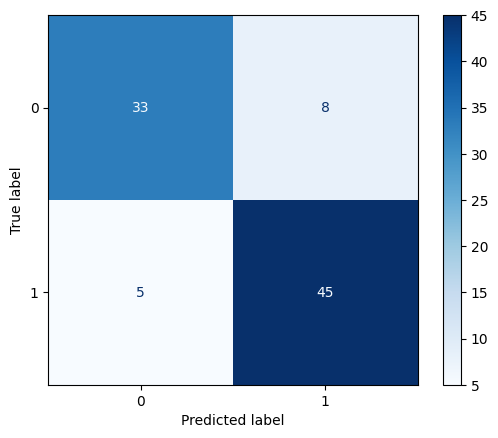

In [531]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test, y_hat_gred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels=grid_lr.classes_)
cmd.plot(cmap=plt.cm.Blues)

# **Probar modelo**

In [517]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [518]:
#datos de prueba
df_prueba = pd.DataFrame({'age':[63], 'trestbps':[140], 'chol':[260],'thalach':[140],
                          'oldpeak':[2.5],'sex':[0], 'cp':[2],'fbs':[1],'restecg':[2],
                          'exang':[0], 'slope':[2],'ca':[1],'thal':[1]})
df_prueba

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,63,140,260,140,2.5,0,2,1,2,0,2,1,1


In [519]:
#antes de predecir los datos de pruba, debemos transfromarlos para que
#esten de la siguiente manera:
df_norm.head(1)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [520]:
#para ello primero voy a codificar las columnas categoricas
#para ello voy a crear una función de onehot_encoding
def df_ohe(df,ohe,column):
    df_copy = df.copy()

    ohe_transform = ohe.transform(df[[column]])

    #se crean las columnas con los valores de one_hot_encoder
    df_ohe = pd.DataFrame(ohe_transform, dtype= int).add_prefix(column+'_')

    #se unen las nuevas columnas al dataset original
    df_copy = df_copy.join(df_ohe)

    #y finalmente se elimina la columna vieja
    df_copy = df_copy.drop([column],axis=1)

    return df_copy

In [521]:
#hgao copia del df original para codificar las columnas categoricas
df_prub_cod = df_prueba.copy()

In [522]:
df_prub_cod = df_ohe(df_prub_cod, ohe_sex, 'sex')
df_prub_cod = df_ohe(df_prub_cod, ohe_cp, 'cp')
df_prub_cod = df_ohe(df_prub_cod, ohe_fbs, 'fbs')
df_prub_cod = df_ohe(df_prub_cod, ohe_restecg, 'restecg')
df_prub_cod = df_ohe(df_prub_cod, ohe_exang, 'exang')
df_prub_cod = df_ohe(df_prub_cod, ohe_slope, 'slope')
df_prub_cod = df_ohe(df_prub_cod, ohe_ca, 'ca')
df_prub_cod = df_ohe(df_prub_cod, ohe_thal, 'thal')

In [523]:
df_prub_cod

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,140,260,140,2.5,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0


In [524]:
#creo copia del df codificado para normalizarlo
df_prub_norm= df_prub_cod.copy()

In [525]:
#Normalizo las columnas continuas
#para ello, voy a usar el scaler hecho anteriormente y la lista de las columnas continuas
df_prub_norm[list_con]=scaler.transform(df_prub_norm[list_con])

In [526]:
df_prub_norm

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.592593,0.5,0.314961,-0.4,1.0625,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0


In [527]:
#Hora de predecir la columna target con el modelo LogisticRegresion
X_prueba = df_prub_norm.values

y_prueba= grid_lr.predict(X_prueba)

if y_prueba ==[1]:
    print('Tienes una enfermedad cardica')
else:
    print('Te encuentras sano')

Tienes una enfermedad cardica


In [528]:
#Ahora tambien por curiosidad podriamos predecir los datos de entrenamiento para ver como le va al modelo:
y_hat_train= grid_lr.predict(X_train)

In [529]:
print(accuracy_score(y_train, y_hat_train, normalize=True))

0.8679245283018868


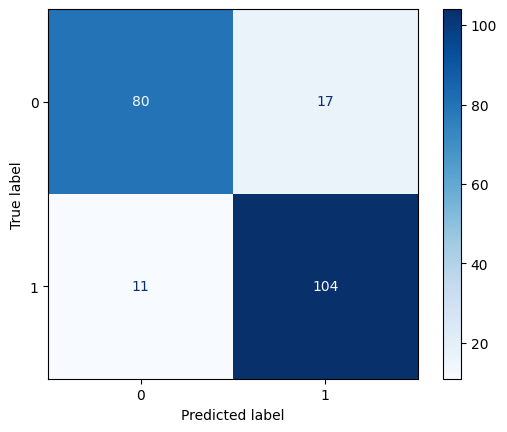

In [530]:
#metrica de cofusión para ver cuanto se confundió el modelo
cm= confusion_matrix(y_train, y_hat_train)
cmd = ConfusionMatrixDisplay(cm, display_labels=grid_lr.classes_)
cmd.plot(cmap=plt.cm.Blues)